In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import matplotlib.pyplot as plt

import os
import pickle #for reading images


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import scipy.ndimage
from skimage import measure, morphology

from keras.layers import Conv2D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy


from keras.models import Model

import keras



from pathlib import Path

import matplotlib.patches as patch

from PIL import Image
from skimage.transform import resize    

import cv2


from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
print(os.listdir("/content/drive/MyDrive/mri_research/data"))

['metadata.csv', 'archive.zip', 'vol01', 'vol02', 'vol03', 'vol04', 'vol05', 'vol06', 'vol07', 'vol08']


Column names:
('examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth', 'volumeFilename')

Shape of volume "/content/drive/MyDrive/mri_research/data/vol01/404663-8.pck": (33, 320, 320)


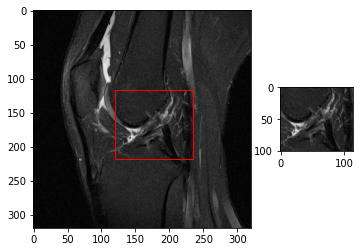

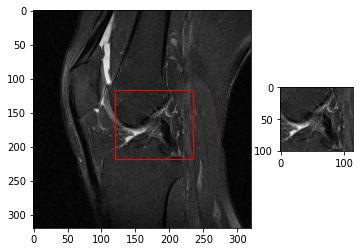

In [ ]:
base_path = "/content/drive/MyDrive/mri_research/data/"

# directory where the volumetric data is located
volumetric_data_dir = f'{base_path}vol01'

# path to metadata csv file
metadata_csv_path = f'{base_path}metadata.csv'

# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True, 
    dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20') 

print('Column names:')
print(metadata.dtype.names)

# Select all rows where examID == 502889
exams = metadata[metadata['examId'] == 404663]

for exam in exams:
    vol_data_file = exam['volumeFilename']

    vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

    # Load data from file
    with open(vol_data_path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        volumetric_data = pickle.load(file_handler)
    
    print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)
    
    # Get all roi slices from volume
    z_start = exam['roiZ']
    depth = exam['roiDepth']
    
    for z in range(z_start, z_start + depth):
    
        slice = volumetric_data[z, :, :]
        
        # Get roi dimensions
        x, y, w, h = [exam[attr] for attr in ['roiX', 'roiY', 'roiWidth', 'roiHeight']]
        
        # Extract ROI
        roi = slice[y:y+h, x:x+w]
        
        # Plot slice and roi
        figure = plt.figure()
        plot = plt.subplot2grid((1, 4), (0, 0), 1, 3) # This makes the slice plot larger than roi plot
        plot.add_patch(patch.Rectangle((x, y), w, h, fill=None, color='red'))
        plot.imshow(slice, cmap='gray')
        plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
        plot.imshow(roi, cmap='gray')
        
        plt.show()

In [ ]:
from tqdm import tqdm
import glob
images_found = []
df=pd.read_csv(f"{base_path}/metadata.csv")
df['path'] = "Image not found"
    # k rows
for index, MRI in tqdm(enumerate(df['volumeFilename'])):
  try:
    file_found_path = glob.glob(base_path+"*/"+MRI )[0]
    df['path'].iloc[index] = (file_found_path)

  except:
    print(file_found_path)
    df['path'].iloc[index]="Image Not Here"
    pass    




0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

813it [00:01, 425.27it/s]

/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data

856it [00:01, 409.50it/s]

/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data

917it [00:02, 444.23it/s]

/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data/vol08/919795-5.pck
/content/drive/MyDrive/mri_research/data

([<matplotlib.patches.Wedge at 0x7f6be617d1d0>,
 [Text(-0.7610410825573642, 0.7942395549580211, '0'),
  Text(0.5954227667048255, -0.924917147040518, '1'),
  Text(1.0797699581550853, -0.209992470021584, '2')])

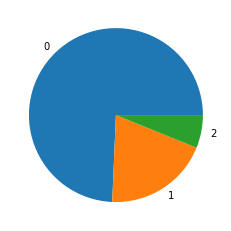

In [ ]:
# Droping records for which we dont have Images
df=df[df['path']!="Image Not Here"]
sizes=df.aclDiagnosis
x=pd.value_counts(sizes)

idx = pd.Int64Index(list(set(df.aclDiagnosis.values)))
Pie_Chart_df = pd.DataFrame(index = idx, data =(x))
plt.pie(Pie_Chart_df.aclDiagnosis,labels=Pie_Chart_df.index)


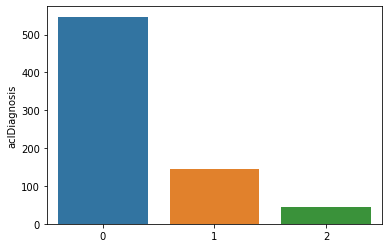

In [ ]:
sns.barplot(x=Pie_Chart_df.index,y=Pie_Chart_df.aclDiagnosis)

This is our **ROI** so that we will focous only this part

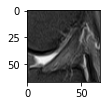

(67, 68)


In [ ]:
#taking record 6 to only visulaize the image
with open(df['path'].iloc[6], 'rb') as file_handler: # Must use 'rb' as the data is binary
    volumetric_data = pickle.load(file_handler)
img=volumetric_data[df['roiZ'].iloc[6], :, :]

x=df["roiX"].iloc[6]
y=df["roiY"].iloc[6]
w=df["roiWidth"].iloc[6]
h=df["roiHeight"].iloc[6]
image_array=img[y:y+h, x:x+w]
figure = plt.figure()
plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
        
plot.imshow(image_array, cmap='gray')
        
        
        
plt.show()
print(image_array.shape)

First we will classify** Binary data** lets see what will be the results
Now Binary Calssifying The clases 
* 1==> Ruptured
* 0==> Healthy

In [ ]:
#making binary dataset
new_df0=df[df.aclDiagnosis==0]
print(len(new_df0))
#selecting equal number of labels from dataset

new_df0=new_df0.sample(100) #200 class having Healthy knee
new_df1=df[df.aclDiagnosis!=0] #almost 200 class having ruptured knee
new_df1['aclDiagnosis']=new_df1.aclDiagnosis.replace(2,1) 
frames = [new_df1, new_df0]
new_df = pd.concat(frames)

547


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([<matplotlib.patches.Wedge at 0x7f6be4dab3d0>,
 [Text(0.5116026827081954, 0.9737878080186554, '0'),
  Text(-0.5116026827081955, -0.9737878080186554, '1')])

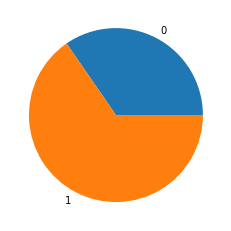

In [ ]:
sizes=new_df.aclDiagnosis
x=pd.value_counts(sizes)

idx = pd.Int64Index([0,1])
Pie_Chart_df = pd.DataFrame(index = idx, data =(x))
plt.pie(Pie_Chart_df.aclDiagnosis,labels=Pie_Chart_df.index)
#their is one forth part of binary positive labels in all dataset

In [ ]:
from PIL import Image
from skimage.transform import resize       
images_path=new_df['path']
image_list = []

for i in range(len(new_df)):
    with open(new_df['path'].iloc[i], 'rb') as file_handler: # Must use 'rb' as the data is binary
        image_array = pickle.load(file_handler)
    img=image_array[new_df['roiZ'].iloc[i], :, :]
    x=new_df["roiX"].iloc[i]
    y=new_df["roiY"].iloc[i]
    w=new_df["roiWidth"].iloc[i]
    h=new_df["roiHeight"].iloc[i]
    image_array=img[y:y+h, x:x+w]
    
    imageB_array = resize(image_array, (90, 90))
    image_list.append(imageB_array)
    
img_list=np.asarray(image_list)

Y=new_df.aclDiagnosis
Y=np.asarray(Y)
Y = to_categorical(Y, num_classes=2)
img_list = img_list.reshape(-1, 90,90,1)
img_list.shape


(289, 90, 90, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    img_list,Y, test_size=0.30, random_state=42)

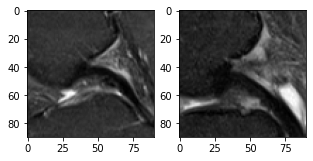

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (90,90))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0], (90,90))
plt.imshow(curr_img, cmap='gray')

This is Our **Deep Nueral Network Model** On which we are going to Train our Images

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras import regularizers
from keras.layers.convolutional import MaxPooling2D

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def model(classes):
    model=Sequential()
        
        # conv2d set  =====> Conv2d====>relu=====>MaxPooling
    model.add(Conv2D(20,(5,5),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(20,(5,5),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(20,(5,5),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
   
    model.add(Flatten())
    
    model.add(Dense(64))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))    
    model.add(Dense(32))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))   
        
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.00001, decay=0),
                  metrics=['accuracy', f1_m,precision_m, recall_m])
    return model

Nice its giving **70% accuracy on binary data** lets apply some **augmentation** on the images to increase the number of images lets see how much it effect on our model

In [ ]:
Binary_model = model(3)
# Binary_model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Now Lets see our model accuracy on Categorical Data
*     0:    Healthy
*     1:    half_Raptured
*     2:    Full_Raptured
    
    

In [ ]:

   
images_path=df['path']
image_list = []

for i in range(len(df)):
    with open(df['path'].iloc[i], 'rb') as file_handler: # Must use 'rb' as the data is binary
        image_array = pickle.load(file_handler)
    img=image_array[df['roiZ'].iloc[i], :, :]
    x=df["roiX"].iloc[i]
    y=df["roiY"].iloc[i]
    w=df["roiWidth"].iloc[i]
    h=df["roiHeight"].iloc[i]
    image_array=img[y:y+h, x:x+w]
    
    imageB_array = resize(image_array, (90, 90))
    image_list.append(imageB_array)
    
img_list=np.asarray(image_list)

Y=df.aclDiagnosis
Y=np.asarray(Y)
Y = to_categorical(Y, num_classes=3)     


In [ ]:
img_list = img_list.reshape(-1, 90,90,1)
img_list.shape

(736, 90, 90, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    img_list,Y, test_size=0.10, random_state=42)


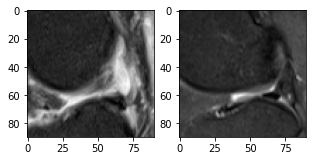

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (90,90))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0], (90,90))
plt.imshow(curr_img, cmap='gray')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/10
21/21 [==============================] - 10s 366ms/step - loss: 0.6926 - accuracy: 0.4441 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 8s 367ms/step - loss: 0.6919 - accuracy: 0.5801 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 8s 366ms/step - loss: 0.6909 - accuracy: 0.6133 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 8s 369ms/step - loss: 0.6894 - accuracy: 0.6420 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 8s 369ms/step - loss: 0.6876 - accuracy: 0.6178 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 8s 368ms/step - loss: 0.6849 - accuracy: 0.6118 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.

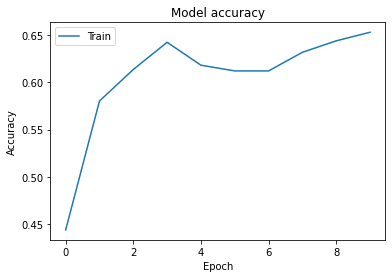

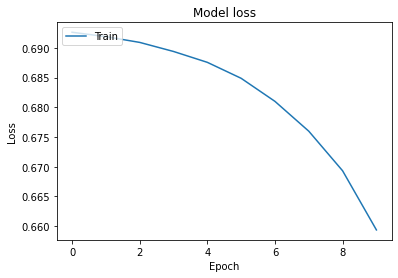

3/3 [==============================] - 0s 69ms/step - loss: 0.6506 - accuracy: 0.7973 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Custom Recall 0.0
Custom accuracy 0.7972972989082336
Custom loss 0.6506296396255493
Custom precision 0.0
Custom f1_score 0.0


In [ ]:

model=model(3)
history =model.fit(X_train, y_train, epochs=10)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



(custom_loss, 
custom_accuracy, 
custom_f1_score, custom_precision, custom_recall) = model.evaluate(X_test, y_test, verbose=1)



print(f"Custom Recall {custom_recall}")
print(f"Custom accuracy {custom_accuracy}")
print(f"Custom loss {custom_loss}")
print(f"Custom precision {custom_precision}")
print(f"Custom f1_score {custom_f1_score}")

#### scores = model.evaluate(X_test,y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [ ]:
x=model.predict(X_test)

In [ ]:
#images which are labeled as Half Raptured
for i in range(1,74):
    ind = np.argmax(x[i])
    
    if ind == 1 : print("Half Raptured Image" + str(i))
    if ind == 2 : print("Full Ruptured Image")

Healthy Image
Healthy Image


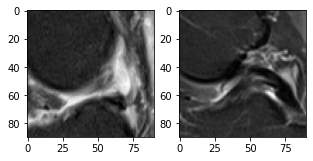

In [ ]:
import random
i=random.choice([1,2,3,4,5])
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (90,90))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[i], (90,90))
plt.imshow(curr_img, cmap='gray')

Predicted_label = np.argmax(x[i])
if Predicted_label == 0 : print("Healthy Image")
if Predicted_label == 1 : print("Half Raptured Image")
if Predicted_label == 2 : print("Full Ruptured Image")
    
    
True_Label = np.argmax(y_test[i])
if True_Label == 0 : print("Healthy Image")
if True_Label == 1 : print("Half Raptured Image")
if True_Label == 2 : print("Full Ruptured Image")

**True Labels**

In [ ]:
for i in range(1,74):
    ind = np.argmax(y_test[i])

    if ind == 1 : print("Half Raptured Image " + str(i))
    if ind == 2 : print("Full Ruptured Image " + str(i))

Full Ruptured Image 5
Full Ruptured Image 15
Half Raptured Image 16
Half Raptured Image 18
Half Raptured Image 23
Half Raptured Image 29
Half Raptured Image 30
Half Raptured Image 35
Full Ruptured Image 36
Half Raptured Image 38
Full Ruptured Image 51
Full Ruptured Image 60
Full Ruptured Image 67
Half Raptured Image 69
Half Raptured Image 71


# InceptionV3

In [ ]:
from PIL import Image
from skimage.transform import resize       
images_path=new_df['path']
image_list = []

for i in range(len(new_df)):
    with open(new_df['path'].iloc[i], 'rb') as file_handler: # Must use 'rb' as the data is binary
        image_array = pickle.load(file_handler)
    img=image_array[new_df['roiZ'].iloc[i], :, :]
    x=new_df["roiX"].iloc[i]
    y=new_df["roiY"].iloc[i]
    w=new_df["roiWidth"].iloc[i]
    h=new_df["roiHeight"].iloc[i]
    image_array=img[y:y+h, x:x+w]
    
    imageB_array = resize(image_array, (224, 224,3))
    image_list.append(imageB_array)
    
img_list=np.asarray(image_list)

Y=new_df.aclDiagnosis
Y=np.asarray(Y)
Y = to_categorical(Y, num_classes=2)
img_list = img_list.reshape(-1, 224,224,3)
img_list.shape


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    img_list,Y, test_size=0.10, random_state=42)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input
import tensorflow as tf



# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=True, classes=2)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_m,precision_m, recall_m])

# train the model on the new data for a few epochs
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 119s 12s/step - loss: 1.8430 - accuracy: 0.5769 - f1_m: 0.5694 - precision_m: 0.5694 - recall_m: 0.5694
Epoch 2/10
9/9 [==============================] - 106s 12s/step - loss: 0.6865 - accuracy: 0.6538 - f1_m: 0.6146 - precision_m: 0.6146 - recall_m: 0.6146
Epoch 3/10
9/9 [==============================] - 106s 12s/step - loss: 0.7285 - accuracy: 0.5923 - f1_m: 0.6076 - precision_m: 0.6076 - recall_m: 0.6076
Epoch 4/10
9/9 [==============================] - 107s 12s/step - loss: 0.7169 - accuracy: 0.6423 - f1_m: 0.6528 - precision_m: 0.6528 - recall_m: 0.6528
Epoch 5/10
9/9 [==============================] - 106s 12s/step - loss: 0.6904 - accuracy: 0.6577 - f1_m: 0.6181 - precision_m: 0.6181 - recall_m: 0.6181
Epoch 6/10
9/9 [==============================] - 105s 12s/step - loss: 0.7189 - accuracy: 0.6154 - f1_m: 0.6528 - precision_m: 0.6528 - recall_m: 0.6528
Epoch 7/10
9/9 [==============================] - 105s 12s/step - loss: 0.73

In [ ]:


(inception_loss, 
inception_accuracy, 
inception_f1_score, inception_precision, inception_recall) = model.evaluate(X_test, y_test, verbose=1)



print(f"Inception Recall {inception_recall}")
print(f"Inception accuracy {inception_accuracy}")
print(f"Inception loss {inception_loss}")
print(f"Inception precision {inception_precision}")
print(f"Inception f1_score {inception_f1_score}")

1/1 [==============================] - 4s 4s/step - loss: 92.7896 - accuracy: 0.6552 - f1_m: 0.6552 - precision_m: 0.6552 - recall_m: 0.6552
Inception Recall 0.6551724076271057
Inception accuracy 0.6551724076271057
Inception loss 92.78955078125
Inception precision 0.6551724076271057
Inception f1_score 0.6551723480224609


# Mobilenet

In [ ]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

model = MobileNet(input_tensor=input_tensor, weights=None, include_top=True, classes=2)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_m,precision_m, recall_m])

# train the model on the new data for a few epochs
model.fit(img_list, Y, epochs=10)

Epoch 1/10
10/10 [==============================] - 50s 4s/step - loss: 0.9500 - accuracy: 0.5709 - f1_m: 0.5156 - precision_m: 0.5156 - recall_m: 0.5156
Epoch 2/10
10/10 [==============================] - 45s 4s/step - loss: 0.8492 - accuracy: 0.5467 - f1_m: 0.4937 - precision_m: 0.4938 - recall_m: 0.4938
Epoch 3/10
10/10 [==============================] - 45s 4s/step - loss: 0.7591 - accuracy: 0.5986 - f1_m: 0.5406 - precision_m: 0.5406 - recall_m: 0.5406
Epoch 4/10
10/10 [==============================] - 45s 4s/step - loss: 0.7061 - accuracy: 0.6436 - f1_m: 0.5812 - precision_m: 0.5813 - recall_m: 0.5813
Epoch 5/10
10/10 [==============================] - 46s 5s/step - loss: 0.6626 - accuracy: 0.6644 - f1_m: 0.6969 - precision_m: 0.6969 - recall_m: 0.6969
Epoch 6/10
10/10 [==============================] - 45s 4s/step - loss: 0.5181 - accuracy: 0.7301 - f1_m: 0.6594 - precision_m: 0.6594 - recall_m: 0.6594
Epoch 7/10
10/10 [==============================] - 45s 4s/step - loss: 0.57

In [ ]:

(mobilenet_loss, 
mobilenet_accuracy, 
mobilenet_f1_score, mobilenet_precision, mobilenet_recall) = model.evaluate(X_test, y_test, verbose=1)



print(f"Mobilenet Recall {mobilenet_recall}")
print(f"Mobilenet accuracy {mobilenet_accuracy}")
print(f"Mobilenet loss {mobilenet_loss}")
print(f"Mobilenet precision {mobilenet_precision}")
print(f"Mobilenet f1_score {mobilenet_f1_score}")

1/1 [==============================] - 1s 1s/step - loss: 0.7073 - accuracy: 0.6552 - f1_m: 0.6552 - precision_m: 0.6552 - recall_m: 0.6552
Mobilenet Recall 0.6551724076271057
Mobilenet accuracy 0.6551724076271057
Mobilenet loss 0.7072921991348267
Mobilenet precision 0.6551724076271057
Mobilenet f1_score 0.6551723480224609


In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=input_tensor, weights=None, include_top=True, classes=2)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_m,precision_m, recall_m])

# train the model on the new data for a few epochs
model.fit(img_list, Y, epochs=10)

Epoch 1/10
10/10 [==============================] - 178s 16s/step - loss: 2.6517 - accuracy: 0.5917 - f1_m: 0.6312 - precision_m: 0.6313 - recall_m: 0.6313
Epoch 2/10
10/10 [==============================] - 166s 16s/step - loss: 0.9336 - accuracy: 0.5952 - f1_m: 0.6344 - precision_m: 0.6344 - recall_m: 0.6344
Epoch 3/10
10/10 [==============================] - 166s 16s/step - loss: 0.8628 - accuracy: 0.6401 - f1_m: 0.6750 - precision_m: 0.6750 - recall_m: 0.6750
Epoch 4/10
10/10 [==============================] - 166s 16s/step - loss: 0.8900 - accuracy: 0.6021 - f1_m: 0.5437 - precision_m: 0.5437 - recall_m: 0.5437
Epoch 5/10
10/10 [==============================] - 166s 16s/step - loss: 1.7165 - accuracy: 0.5398 - f1_m: 0.5844 - precision_m: 0.5844 - recall_m: 0.5844
Epoch 6/10
10/10 [==============================] - 166s 16s/step - loss: 0.8466 - accuracy: 0.6125 - f1_m: 0.6500 - precision_m: 0.6500 - recall_m: 0.6500
Epoch 7/10
10/10 [==============================] - 166s 16s/ste

In [32]:

(resnet_loss, 
resnet_accuracy, 
resnet_f1_score, resnet_precision, resnet_recall) = model.evaluate(X_test, y_test, verbose=1)



print(f"Resnet Recall {resnet_recall}")
print(f"Resnet accuracy {resnet_accuracy}")
print(f"Resnet loss {resnet_loss}")
print(f"Resnet precision {resnet_precision}")
print(f"Resnet f1_score {resnet_f1_score}")

1/1 [==============================] - 5s 5s/step - loss: 0.7932 - accuracy: 0.6552 - f1_m: 0.6552 - precision_m: 0.6552 - recall_m: 0.6552
Resnet Recall 0.6551724076271057
Resnet accuracy 0.6551724076271057
Resnet loss 0.7932372093200684
Resnet precision 0.6551724076271057
Resnet f1_score 0.6551723480224609


In [ ]:
import plotly.graph_objects as go
matrics=['Recall', 'Accuracy', 'Precesion','Loss','F1-Score']

fig = go.Figure(data=[
    go.Bar(name='Mobilenet', x=matrics, y=[mobilenet_loss,  mobilenet_accuracy, mobilenet_f1_score, mobilenet_precision, mobilenet_recall]),
    go.Bar(name='Inception', x=matrics, y=[inception_loss, inception_accuracy, inception_f1_score, inception_precision, inception_recall]),
    go.Bar(name='Resnet Net', x=matrics, y=[resnet_loss, resnet_accuracy, resnet_f1_score, resnet_precision, resnet_recall]),
    go.Bar(name='Custom Net', x=matrics, y=[custom_loss, custom_accuracy, custom_f1_score, custom_precision, custom_recall])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()